# Exploratory data analysis (EDA) for Heart Disease UCI

### Data from the competition on the site kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

#### Data description:
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# прописываем путь до файла
PATH_FILE = '../data/heart.csv'

In [3]:
# загружаем данные
data_heart = pd.read_csv(PATH_FILE)
# посмотрим на данные
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# посмотрим информацию по столбцам
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# посмотрим на основные характеристики датасета
# числовые признаки
data_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
# посмотрим, есть ли пропущенные значения в датасете и в каких столбцах
val_isnull = data_heart.isnull().sum()
if np.sum(val_isnull) == 0:
    print(f"""Пустых значений в датасете нет. \n{val_isnull}""")
else:
    print(f"""В датасете присутствуют пустые значения в количестве: {np.sum(val_isnull)}. \n{val_isnull}""")

Пустых значений в датасете нет. 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# посмотрим распределение target
data_heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

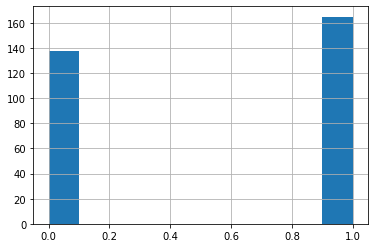

In [8]:
# визуализируем распределение target
data_heart.target.hist()

In [9]:
# определим признаки датасета
data_heart_feature_all = data_heart.drop('target', axis=1)
# определим метку датасета
data_heart_target = data_heart[['target']]

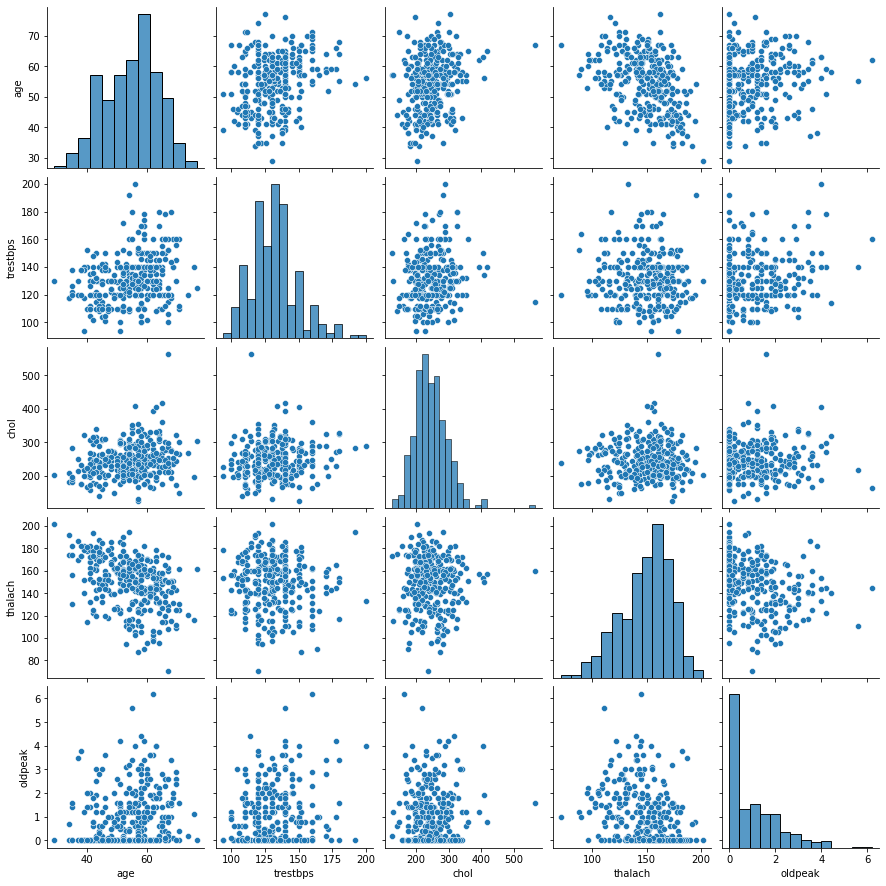

In [10]:
# посмотрим связь между различных признаков.
# На диагонали матрицы графиков расположены гистограммы распределений признака,
# остальные же графики — это обычные scatter plots для соответствующих пар признаков.

# для численных значений
numerical_feature = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sns_plot_numerical = sns.pairplot(data_heart_feature_all[numerical_feature]) 

array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'slope'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'ca'}>, <AxesSubplot:>]],
      dtype=object)

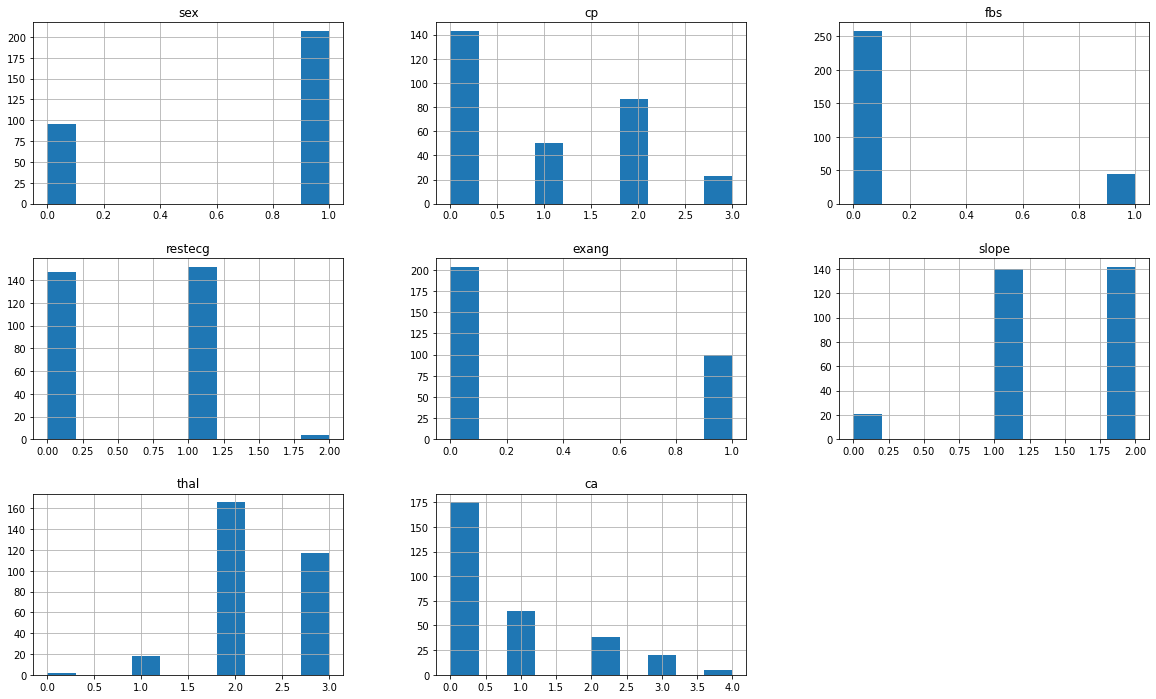

In [11]:
# для категориальных значений посмотрим на распределение
categorical_feature = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
data_heart_feature_all[categorical_feature].hist(figsize=(20,12))

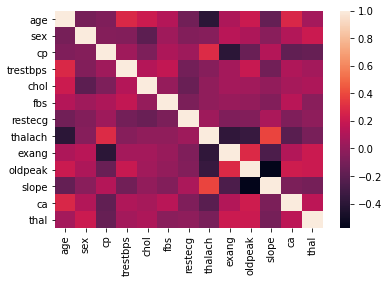

In [12]:
# посмотрим на матрицу корреляции признаков
sns_heatmap = sns.heatmap(data_heart_feature_all.corr())

### На матрице корреляции видно, что признаки slope и oldpeak сильно коррелируют между собой